In [34]:

import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import joblib

In [43]:

# load the MNIST digits dataset
mnist = datasets.load_digits()
n_samples = len(mnist.images)
print(n_samples)
data = mnist.images.reshape((n_samples, -1))
# Training and testing split,
# 75% for training and 25% for testing
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(mnist.data), mnist.target, test_size=0.25, random_state=42)

# take 10% of the training data and use that for validation
(trainData, valData, trainLabels, valLabels) = train_test_split(trainData, trainLabels, test_size=0.1, random_state=84)


1797


In [29]:
# Checking sizes of each data split
print("training data points: {}".format(len(trainLabels)))
print("validation data points: {}".format(len(valLabels)))
print("testing data points: {}".format(len(testLabels)))

training data points: 1212
validation data points: 135
testing data points: 450


In [44]:
from sklearn.neighbors import KNeighborsClassifier
kVals = range(1, 30, 2)
accuracies = []

# loop over kVals
for k in kVals:
    # train the classifier with the current value of `k`
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(trainData, trainLabels)

    # evaluate the model and print the accuracies list
    score = model.score(valData, valLabels)
    print("k=%d, accuracy=%.2f%%" % (k, score * 100))
    accuracies.append(score)

k=1, accuracy=99.26%
k=3, accuracy=99.26%
k=5, accuracy=99.26%
k=7, accuracy=99.26%
k=9, accuracy=99.26%
k=11, accuracy=99.26%
k=13, accuracy=99.26%
k=15, accuracy=99.26%
k=17, accuracy=98.52%
k=19, accuracy=98.52%
k=21, accuracy=97.78%
k=23, accuracy=97.04%
k=25, accuracy=97.78%
k=27, accuracy=97.04%
k=29, accuracy=97.04%


In [45]:
from sklearn.metrics import classification_report
# largest accuracy
# np.argmax returns the indices of the maximum values along an axis
i = np.argmax(accuracies)
print("k=%d achieved highest accuracy of %.2f%% on validation data" % (kVals[i],
    accuracies[i] * 100))


# Now that I know the best value of k, re-train the classifier
model = KNeighborsClassifier(n_neighbors=kVals[i])
model.fit(trainData, trainLabels)

# Predict labels for the test set
predictions = model.predict(testData)

# Evaluate performance of model for each of the digits
print("EVALUATION ON TESTING DATA")
print(classification_report(testLabels, predictions))

k=1 achieved highest accuracy of 99.26% on validation data
EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      1.00      0.97        37
           2       1.00      1.00      1.00        38
           3       0.98      0.98      0.98        46
           4       0.98      0.98      0.98        55
           5       0.98      1.00      0.99        59
           6       1.00      1.00      1.00        45
           7       1.00      0.98      0.99        41
           8       0.97      0.95      0.96        38
           9       0.96      0.94      0.95        48

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



0.9822222222222222


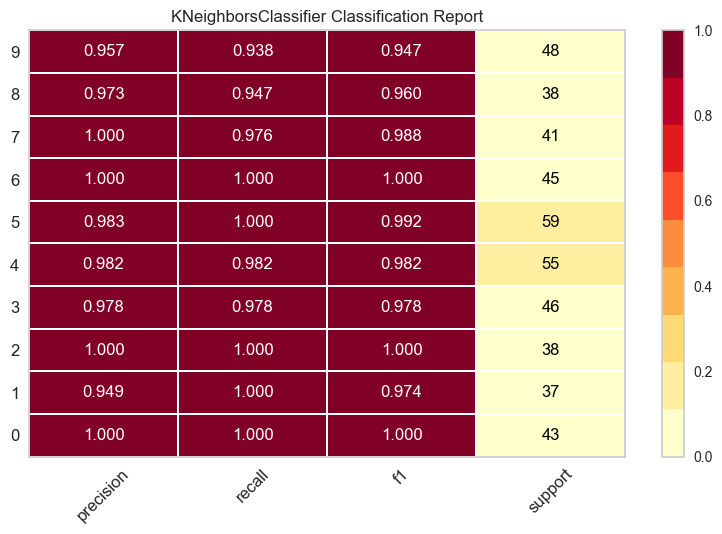

In [49]:
from yellowbrick.classifier import ClassificationReport

model = KNeighborsClassifier(n_neighbors=kVals[i])
model.fit(trainData, trainLabels)

joblib.dump(model, './models/knn_model_MINST.pkl')
model_score = model.score(testData, testLabels)
print(model_score)
classes = range(10)
visualizer = ClassificationReport(model, classes=classes, support=True)

visualizer.fit(trainData, trainLabels)  # Fit the visualizer and the model
visualizer.score(testData, testLabels)  # Evaluate the model on the test data

g = visualizer.poof()             # Draw/show/poof the data

In [51]:
knn = joblib.load('./models/knn_model_MINST.pkl')

# extract the features from the image to predict
def feature_extraction(image):
    return hog(image, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(2, 2), transform_sqrt=True, block_norm='L2-Hys')


def predict(df):
    predict = knn.predict(df.reshape(1,-1))[0]
    predict_proba = knn.predict_proba(df.reshape(1,-1))
    return predict, predict_proba[0][predict]
digits = []

image = cv2.imread('../../Training/Dataset/digits/4/Cell_98_Test_3.jpg' , cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (42, 42))
digits.append(image)
# load your image from file
# extract featuress
hogs = list(map(lambda x: feature_extraction(x), digits))
# apply k-NN model created in previous
predictions = list(map(lambda x: predict(x), hogs))


print(predictions)

ValueError: X has 576 features, but KNeighborsClassifier is expecting 64 features as input.